<a href="https://colab.research.google.com/github/Sakib635/Artificial-Intelligence-projects/blob/main/Lab_8(Sklearn_Library).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip show scikit-learn 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
 
#data-preprocessing
 
breast_cancer=pd.read_csv('/content/drive/MyDrive/breast cancer classification dataset (1).csv')
 
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(breast_cancer[['radius_mean']])
breast_cancer['radius_mean'] = impute.transform(breast_cancer[['radius_mean']])
 
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(breast_cancer[['fractal_dimension_worst']])
breast_cancer['fractal_dimension_worst'] = impute.transform(breast_cancer[['fractal_dimension_worst']])
 
enc = LabelEncoder()
 
breast_cancer['diagnosis'] = enc.fit_transform(breast_cancer['diagnosis'])
 
breast_cancer = breast_cancer.drop(['id','Unnamed: 32'], axis = 1)


 
#split dataset in features and target variable
feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se' ,'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
X = breast_cancer[feature_cols] # Features
y = breast_cancer.diagnosis # Target variable



#Here, the Dataset is broken into two parts in a ratio of 8:2. 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
#Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

pre_PCA_svc_Training_accuracy=format(svc.score(x_train, y_train))
pre_PCA_svc_Testing_accuracy=format(svc.score(x_test, y_test))



In [ ]:
#Neural Network Classifier 
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)

pre_PCA_nnc_Training_accuracy=format(nnc.score(x_train, y_train))
pre_PCA_nnc_Testing_accuracy=format(nnc.score(x_test, y_test))



In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)

pre_PCA_rfc_Training_accuracy=format(rfc.score(x_train, y_train))
pre_PCA_rfc_Testing_accuracy=format(rfc.score(x_test, y_test))

In [ ]:
#Dimensionality Reduction
from sklearn.decomposition import PCA 
pca = PCA(n_components=15)

principal_components= pca.fit_transform(breast_cancer)

principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2", "principle component 3", "principle component 4", "principle component 5", "principle component 6", "principle component 7", "principle component 8", "principle component 9", "principle component 10", "principle component 11", "principle component 12", "principle component 13", "principle component 14", "principle component 15"])
#principal_df.head()
main_df=pd.concat([principal_df,breast_cancer.diagnosis], axis=1)


In [ ]:

 
#split dataset in features and target variable after Performing dimensionality reduction using PCA
feature = ["principle component 1", "principle component 2", "principle component 3", "principle component 4", "principle component 5", "principle component 6", "principle component 7", "principle component 8", "principle component 9", "principle component 10", "principle component 11", "principle component 12", "principle component 13", "principle component 14", "principle component 15"]
X_post_PCA = main_df[feature] # Features
y_post_PCA = main_df.diagnosis # Target variable



#Here, the Dataset is broken into two parts in a ratio of 8:2. 
from sklearn.model_selection import train_test_split
x_train_post_PCA, x_test_post_PCA, y_train_post_PCA, y_test_post_PCA=train_test_split(X_post_PCA, y_post_PCA, test_size=0.2, random_state=0)

In [ ]:
#Support Vector Classifier after Performing dimensionality reduction using PCA
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train_post_PCA, y_train_post_PCA)

post_PCA_svc_Training_accuracy=format(svc.score(x_train_post_PCA, y_train_post_PCA))
post_PCA_svc_Testing_accuracy=format(svc.score(x_test_post_PCA, y_test_post_PCA))




#Neural Network Classifier  after Performing dimensionality reduction using PCA
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train_post_PCA, y_train_post_PCA)

post_PCA_nnc_Training_accuracy=format(nnc.score(x_train_post_PCA, y_train_post_PCA))
post_PCA_nnc_Testing_accuracy=format(nnc.score(x_test_post_PCA, y_test_post_PCA))




#Random Forest Classifier after Performing dimensionality reduction using PCA
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(x_train_post_PCA, y_train_post_PCA)

post_PCA_rfc_Training_accuracy=format(rfc.score(x_train_post_PCA, y_train_post_PCA))
post_PCA_rfc_Testing_accuracy=format(rfc.score(x_test_post_PCA, y_test_post_PCA))


In [ ]:
# accuracy comparison of the pre-PCA and post-PCA svc results on bar chart
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,15), 'figure.dpi':100})
 
x=['pre_PCA_svc_Training_accuracy','post_PCA_svc_Training_accuracy','pre_PCA_svc_Testing_accuracy', 'post_PCA_svc_Testing_accuracy']
y =[pre_PCA_svc_Training_accuracy, post_PCA_svc_Training_accuracy,pre_PCA_svc_Testing_accuracy, post_PCA_svc_Testing_accuracy]
 
plt.bar(x,y)
plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('pre-PCA and post-PCA svc results Accuracy')
plt.show()


NameError: ignored

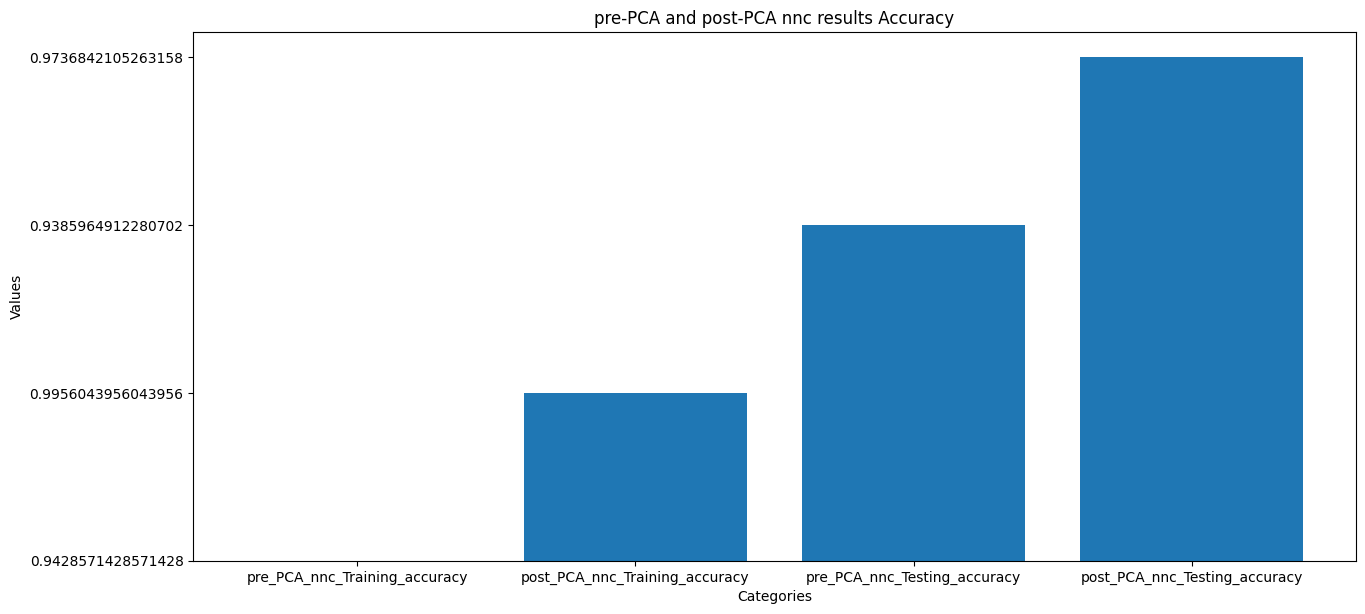

In [ ]:
# accuracy comparison of the pre-PCA and post-PCA nnc results on bar chart
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,7), 'figure.dpi':100})
 
x=['pre_PCA_nnc_Training_accuracy','post_PCA_nnc_Training_accuracy','pre_PCA_nnc_Testing_accuracy', 'post_PCA_nnc_Testing_accuracy']
y =[pre_PCA_nnc_Training_accuracy, post_PCA_nnc_Training_accuracy,pre_PCA_nnc_Testing_accuracy, post_PCA_nnc_Testing_accuracy]
 
plt.bar(x,y)
plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('pre-PCA and post-PCA nnc results Accuracy')
plt.show()

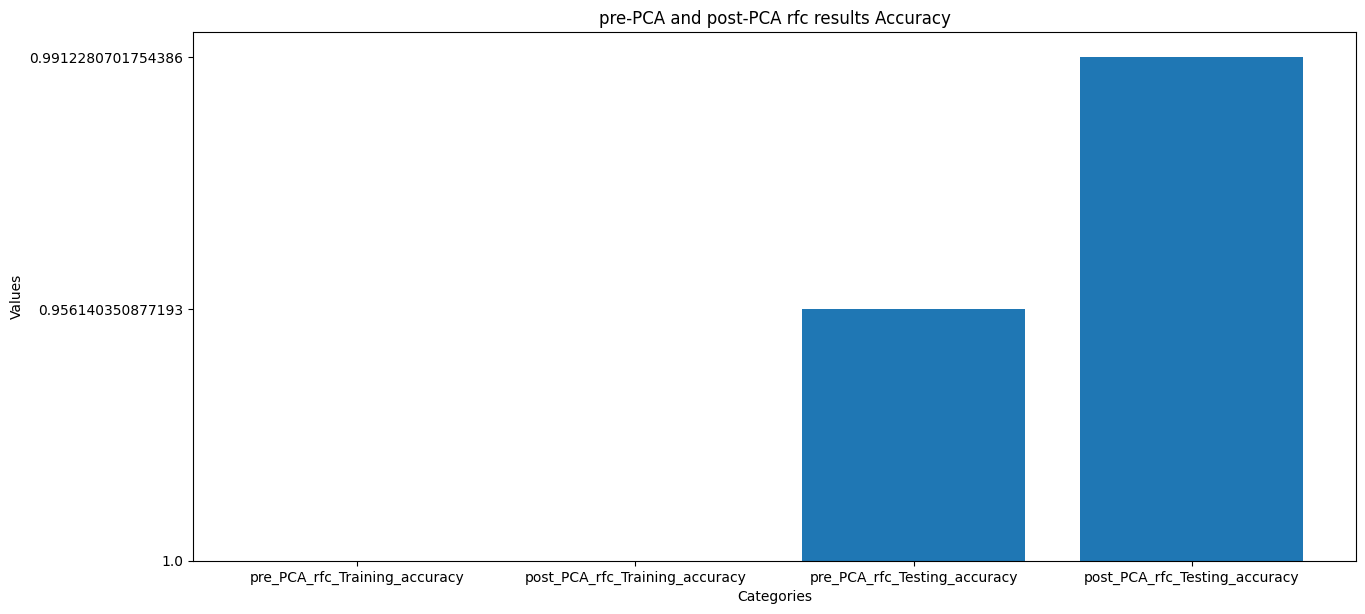

In [ ]:
# accuracy comparison of the pre-PCA and post-PCA rfc results on bar chart
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(15,7), 'figure.dpi':100})
 
x=['pre_PCA_rfc_Training_accuracy','post_PCA_rfc_Training_accuracy','pre_PCA_rfc_Testing_accuracy', 'post_PCA_rfc_Testing_accuracy']
y =[pre_PCA_rfc_Training_accuracy, post_PCA_rfc_Training_accuracy,pre_PCA_rfc_Testing_accuracy, post_PCA_rfc_Testing_accuracy]
 
plt.bar(x,y)
plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('pre-PCA and post-PCA rfc results Accuracy')
plt.show()